In [1]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [2]:
doc = DocumentFile.from_pdf('../data/raw_minutes/lake_charles/lcfpcsb/2021 0227 records 2018.pdf')

In [3]:
predictor = ocr_predictor(pretrained=True)


/Users/khoipham/.virtualenvs/base/lib/python3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(
/Users/khoipham/.virtualenvs/base/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


101971968it [00:59, 1725655.81it/s]                               


63287296it [00:35, 1805663.76it/s]                              


In [4]:
result = predictor(doc)

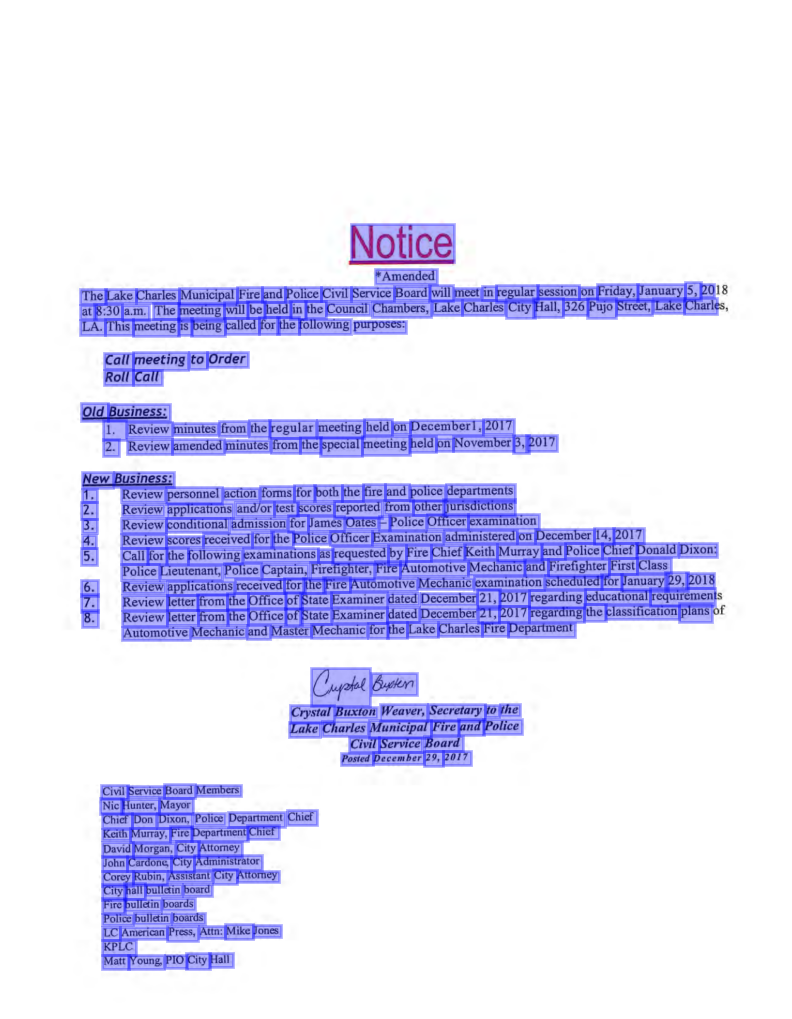

In [30]:
result.show(doc[:1])

In [34]:
pages = [
            "\n".join([" ".join([word.value for word in ln.words]) for blk in pg.blocks for ln in blk.lines])
            for pg in result.pages
            
        ]

In [23]:
import json
import re
with open('../data/ocr_cache/data/raw_minutes/16165e62c368ff73e2a51c6f53d659663dae635b.json', 'r') as f:
    d = json.loads(f.read())
sum([1 if any([re.match(r'^\d$', s) for s in pg.split('\n')[-4:]]) else 0 for pg in d])

4

[
    "Notice",
    "*Amended",
    "The Lake Charles Municipal Fire and Police Civil Service Board will meet in regular session on Friday, January 5, 20",
    "at 8:30 a.m. The meeting will be held in the Council Chambers, Lake Charles City Hall, 326 Pujo Street, Lake Charle",
    "LA. This meeting is being called for the following purposes:",
    "Call meeting to Order",
    "Roll Call",
    "Old Business:",
    "1, Review minutes from the regular meeting held on Decemberl, 2017",
    "2. Review amended minutes from the special meeting held on November 3, 2017",
    "1. Review personnel action forms for both the fire and poli\u00e7e departments",
    "2. Review applications and/or test scores reported from other jurisdictions",
    "3. Review conditional admission for James Oates - Police Officer examination",
    "New Business:",
    "4. Review scores received for the Police Officer Examination administered on December 14, 2017",
    "5. Call for the following examinations as reques

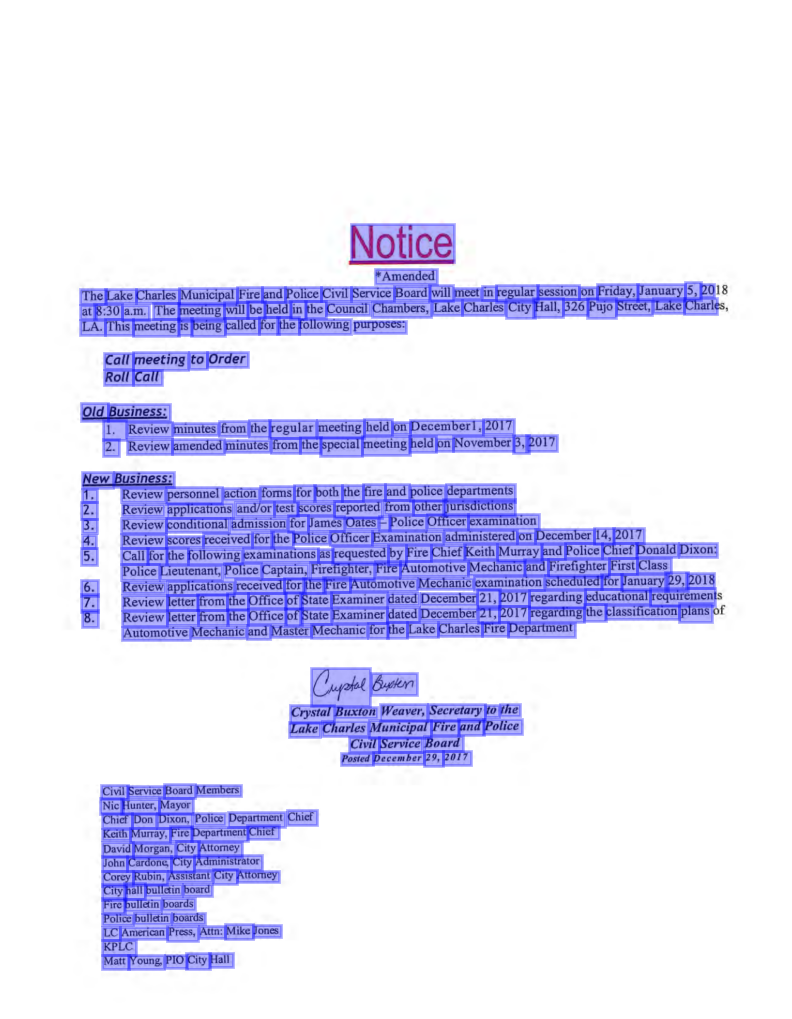

In [36]:
def show(page:int):
    print(json.dumps(pages[page].split("\n"), indent=4))
    result.show(doc[page:page+1])
show(0)

In [33]:
[
            "\n".join([" ".join([word.value for word in ln.words]) for blk in pg.blocks for ln in blk.lines])
            for pg in result.pages
            
        ]

['Notice\n*Amended\nThe Lake Charles Municipal Fire and Police Civil Service Board will meet in regular session on Friday, January 5, 20\nat 8:30 a.m. The meeting will be held in the Council Chambers, Lake Charles City Hall, 326 Pujo Street, Lake Charle\nLA. This meeting is being called for the following purposes:\nCall meeting to Order\nRoll Call\nOld Business:\n1, Review minutes from the regular meeting held on Decemberl, 2017\n2. Review amended minutes from the special meeting held on November 3, 2017\n1. Review personnel action forms for both the fire and poliçe departments\n2. Review applications and/or test scores reported from other jurisdictions\n3. Review conditional admission for James Oates - Police Officer examination\nNew Business:\n4. Review scores received for the Police Officer Examination administered on December 14, 2017\n5. Call for the following examinations as requested by Fire Chief Keith Murray and Police Chief Donald Dixon:\nPolice Lieutenant, Police Captain, Fi